<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/CS680Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danni Jin AI:680 Spring 2020 assignment #1
Predicting house prices
to create your very first neural network to predict whether the house price is below or above median value. We will go through the following in this notebook:

Exploring and Processing the Data 
Building and Training our Neural Network
Visualizing Loss and Accuracy
Adding Regularization to our Neural Network



# Exploring and Processing the Data
We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [0]:
#Imports
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [0]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/dnjhaha/AML/master/housing.csv'
house = pd.read_csv(url)
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


import pandas as pd
This just means that if I want to refer to code in the package ‘pandas’, I’ll refer to it with the name pd. We then read in the CSV file by running this line of code: df = pd.read_csv(url) This line of code means that we will read the csv file (which should be in the same directory as your notebook) and store it in the variable ‘house’. If we want to find out what is in house, simply type df into the grey box and click Alt-Enter:

**Statistics Summary：Find out the nature of data**

In [0]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Here, you can explore the data a little. We have our input features in the first ten columns:
1)longitude	2)latitude	3)housing_median_age	4)total_rooms	5)total_bedrooms 6)population	7)households	8)median_income	
In the ninth column, we have the feature that we would like to predict.

**Histogram**

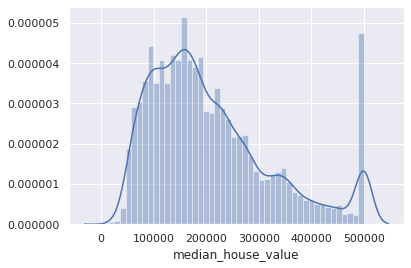

In [0]:

sns.distplot(house['median_house_value'])

**plot a histogram for each numerical attribute:**

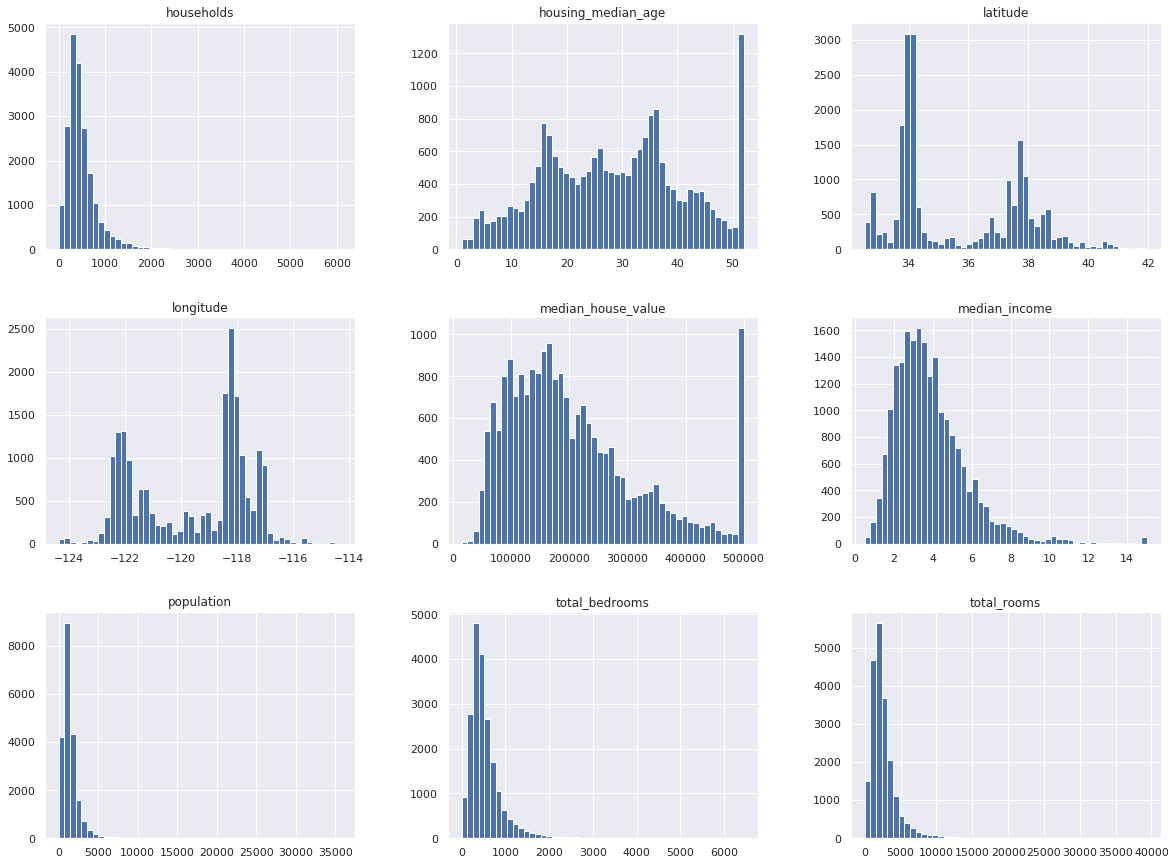

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))
plt.show()

**Linear Relationship Ratios：Show what data that has a linear or some kind of relationship to the sale price**

In [0]:
corr_matrix = house.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


**Create a scatterplot**

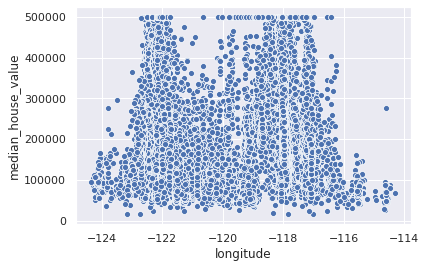

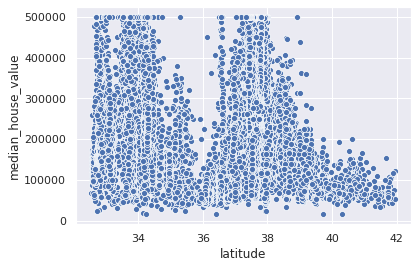

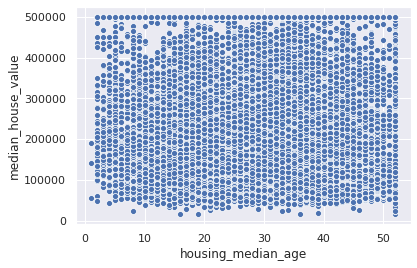

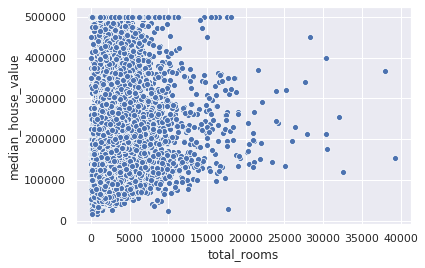

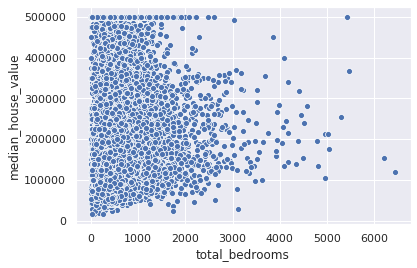

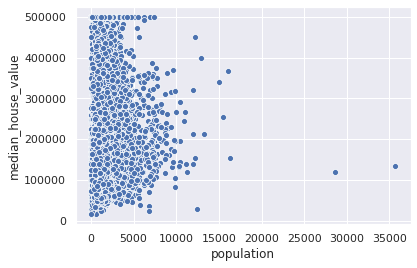

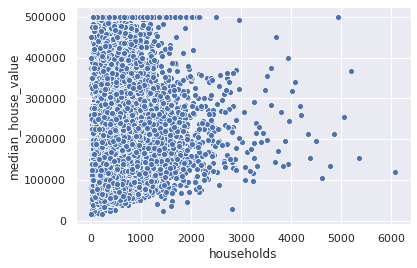

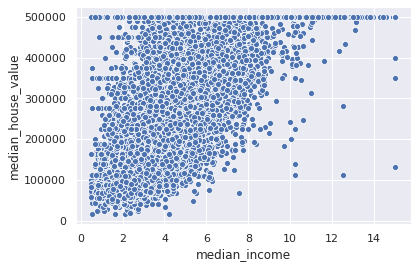

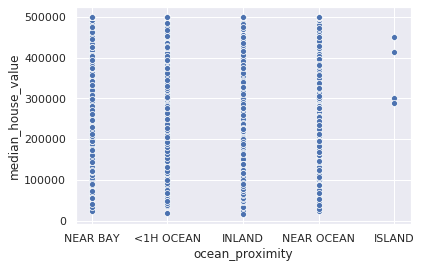

In [0]:
#Scatterplots
sns.set()
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
for column in columns:
    plt.figure()
    sns.scatterplot(house[column], house['median_house_value'])
#this plot reveals that the median_income and median_house_value correlation is indeed very strong,
# you can clearly see the upward trend and the points are not too dispersed.

**Visualizing Geographical Data:Any other useful tool to understand the data better**

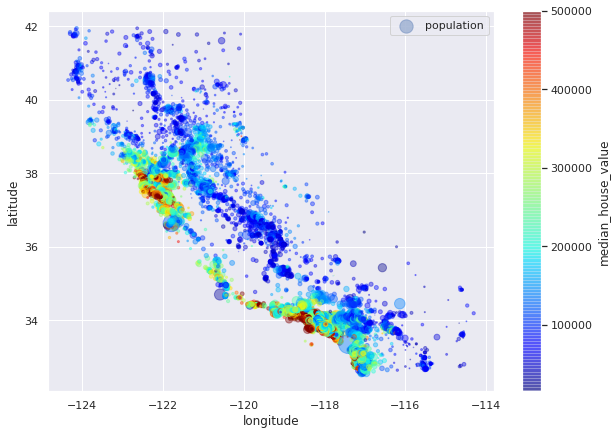

In [0]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=house["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


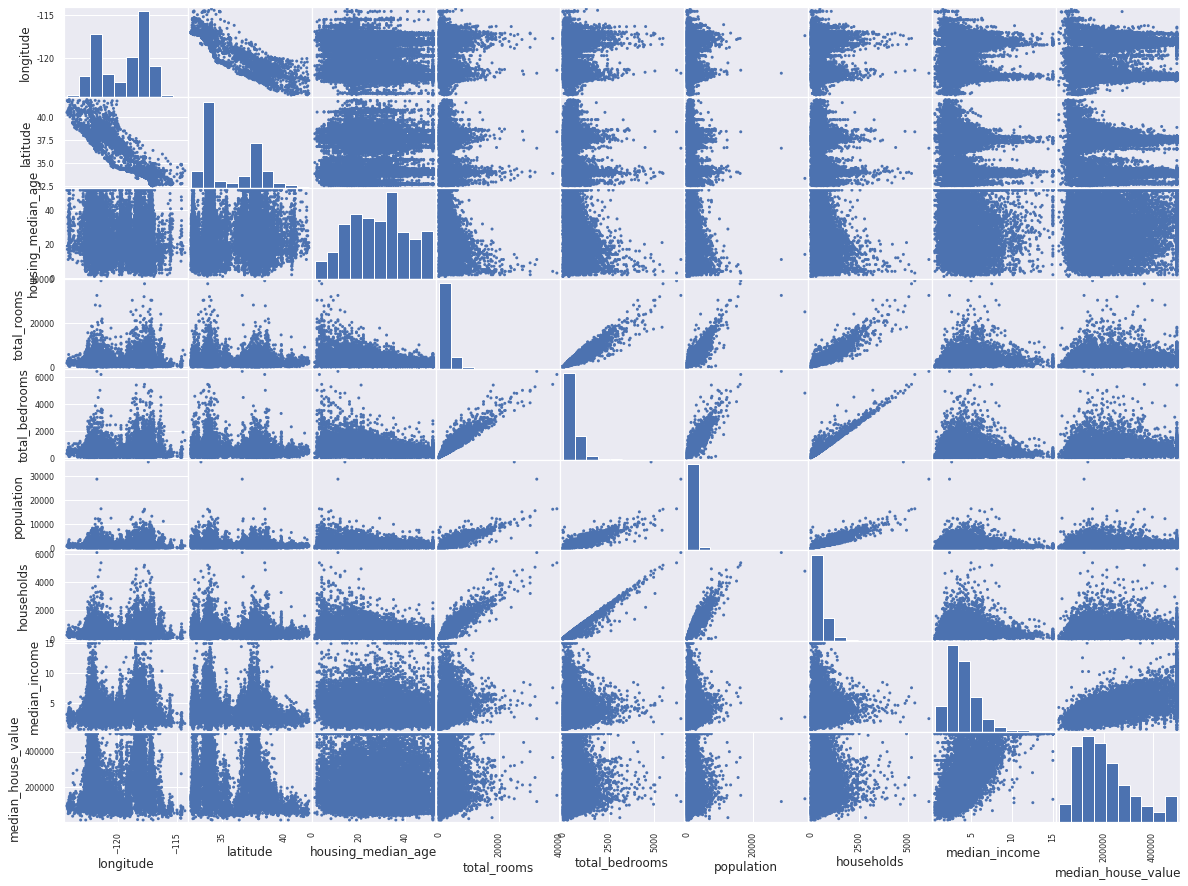

In [0]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(20,15))
scatter_matrix(house,alpha=1, ax=ax)
plt.show()

**Create a heat map**

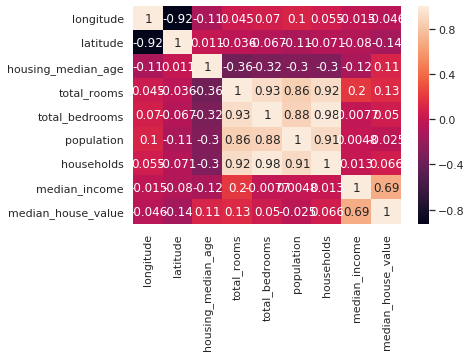

In [0]:
sns.heatmap(house.corr(), annot=True)

**Read in the CSV (comma separated values) file**

In [0]:
# Reload dataset in case data was changed
import pandas as pd 
url = 'https://raw.githubusercontent.com/dnjhaha/AML/master/housing.csv'
house = pd.read_csv(url)


**Drop the less unimportant features**

In [0]:
# Excluding non-numerical data
# alternatively: housing_num = house.select_dtypes(exclude=['object'])
housing_num = house.drop('ocean_proximity', axis=1)

**calculate the last column:median_house_value median.**

In [0]:
median = housing_num["median_house_value"].median()

**rename the last column name to AboveMedianPrice.**

In [0]:
housing_num.columns=['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',	'AboveMedianPrice']

In [164]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,AboveMedianPrice
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


**in order to make the label's value is 0 or 1; the house price is above the median or not. (1 for yes and 0 for no)**

In [0]:
housing_num.loc[housing_num.AboveMedianPrice>=median,'AboveMedianPrice'] =1;

In [0]:
housing_num.loc[housing_num.AboveMedianPrice>1,'AboveMedianPrice'] =0;

In [168]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,AboveMedianPrice
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0


check the NaN value in the column.

In [169]:
#Missing data
# Calculates the percentage of data missing for all features
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
total_bedrooms,207,0.010029
ocean_proximity,0,0.000000
median_house_value,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000
total_rooms,0,0.000000
housing_median_age,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


**Drop features which has many NaN values**

In [0]:
house=housing_num.dropna(subset=["total_bedrooms"]) 

In [171]:
#Missing data
# Calculates the percentage of data missing for all features
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
AboveMedianPrice,0,0.0
median_income,0,0.0
households,0,0.0
population,0,0.0
total_bedrooms,0,0.0
total_rooms,0,0.0
housing_median_age,0,0.0
latitude,0,0.0
longitude,0,0.0


**The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:**

In [0]:
dataset =house.values

**Split our dataset into the input features (which we call x) and the label (which we call y).**

In [0]:
# SalePrice goes into Y and the other values into X
X = dataset[:,:8]
Y = dataset[:,8]

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 8 columns of our array to a variable called X and the last column of our array to a variable called Y. The code to do the first assignment is this:

X = dataset[:,0:8] This might look a bit weird, but let me explain what’s inside the square brackets. Everything before the comma refers to the rows of the array and everything after the comma refers to the columns of the arrays.

Since we’re not splitting up the rows, we put ‘:’ before the comma. This means to take all the rows in dataset and put it in X.

We want to extract out the first 8 columns, and so the ‘0:8’ after the comma means take columns 0 to 7 and put it in X (we don’t include column 8). Our columns start from index 0, so the first 8 columns are really columns 0 to 7. We then assign the last column of our array to Y:

Y = dataset[:,8] Ok, now we’ve split our dataset into input features (X) and the label of what we want to predict (Y).

# Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

Make sure that the scale of the input features are similar.
This makes it difficult for the initialization of the neural network, which causes some practical problems. One way to scale the data is to use an existing package from scikit-learn

In [0]:
from sklearn import preprocessing

This says I want to use the code in ‘preprocessing’ within the sklearn package. Then, we use a function called the min-max scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive:

min_max_scaler = preprocessing.MinMaxScaler() Now, our scaled dataset is stored in the array ‘X_scale’. If you wish to see what ‘X_scale’ looks like, simply run the cell:

X_scale

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [176]:
X_scale

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.00894083, 0.02055583,
        0.53966842],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.0672104 , 0.18697583,
        0.53802706],
       [0.21015936, 0.5642933 , 1.        , ..., 0.01381765, 0.02894261,
        0.46602805],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.0281398 , 0.07104095,
        0.08276438],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.02068444, 0.05722743,
        0.09429525],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.03879032, 0.08699227,
        0.13025338]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.Now, we are down to our last step in processing the data, which is to split our dataset into a training set, a validation set and a test set.

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

from sklearn.model_selection import train_test_split Then, split your dataset like this:

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2) This tells scikit-learn that your val_and_test size will be 20% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [180]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(16346, 8) (2043, 8) (2044, 8) (16346,) (2043,) (2044,)


# In summary, we now have a total of six variables for our datasets we will use:
X_train (8 input features, 80% of full dataset)
X_val (8 input features, 10% of full dataset)
X_test (8 input features, 10% of full dataset)
Y_train (1 label, 80% of full dataset)
Y_val (1 label, 10% of full dataset)
Y_test (1 label, 10% of full dataset)
If you want to see how the shapes of the arrays are for each of them (i.e. what dimensions they are), simply run

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
As you can see, the training set has 16346 data points while the validation and test set has 2043 data points each. The X variables have 8 input features, while the Y variables only has one feature to predict.

# Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use: First Step: Setting up the Architecture

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network: In words, we want to have these layers:

Hidden layer 1: 32 neurons, ReLU activation Hidden layer 2: 32 neurons, ReLU activation Output Layer: 1 neuron, Sigmoid activation Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. First, let’s import the necessary code from Keras:

from keras.models import Sequential from keras.layers import Dense Then, we specify that in our Keras sequential model like this:

model = Sequential([ Dense(32, activation='relu', input_shape=(8,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'), ]) model = Sequential([ ... ])

This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.

Dense(32, activation='relu', input_shape=(8,)),

We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 8 since we have 8 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.

Dense(32, activation='relu'),

Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.

Dense(1, activation='sigmoid'),

Our third layer is a dense layer with 1 neuron, sigmoid activation.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

Hidden layer 1: 30 neurons, ReLU activation
Hidden layer 2: 30 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation

In [0]:
#Create Model
model = Sequential([ #Create the single input layer
    Dense(32, activation = 'relu', input_shape = (8,)), # Creating only two hidden layers as the NN becomes harder to train as more hidden layers are added.
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'), #Create the signle output layer since this is NN is regression
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)
                                                                    Second Step: Filling in the best numbers


model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
We put the following settings inside the brackets after model.compile:

optimizer='sgd'

‘sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent)
                                                                    loss='binary_crossentropy'

The loss function for outputs that take the values 1 or 0 is called binary cross entropy.

metrics=['accuracy']

Lastly, we want to track accuracy on top of the loss function. Now once we’ve run that cell, we are ready to train!

We do so below:

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:

what data we are training on, which is X_train and Y_train
the size of our mini-batch
how long we want to train it for (epochs)
what our validation data is so that the model will tell us how we are doing on the validation data at each point. The function is called ‘fit’ as we are fitting the parameters to the data. We have to specify what data we are training on, which is X_train and Y_train. Then, we specify the size of our mini-batch and how long we want to train it for (epochs). Lastly, we specify what our validation data is so that the model will tell us how we are doing on the validation data at each point. This function will output a history, which we save under the variable hist. We’ll use this variable a little later when we get to visualization.
This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [184]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 16346 samples, validate on 2043 samples
Epoch 1/100
16346/16346 [==============================] - 1s 63us/step - loss: 0.6935 - acc: 0.5396 - val_loss: 0.6866 - val_acc: 0.5761
Epoch 2/100
16346/16346 [==============================] - 1s 46us/step - loss: 0.6793 - acc: 0.6454 - val_loss: 0.6721 - val_acc: 0.7024
Epoch 3/100
16346/16346 [==============================] - 1s 47us/step - loss: 0.6604 - acc: 0.7212 - val_loss: 0.6485 - val_acc: 0.7313
Epoch 4/100
16346/16346 [==============================] - 1s 48us/step - loss: 0.6284 - acc: 0.7537 - val_loss: 0.6079 - val_acc: 0.7744
Epoch 5/100
16346/16346 [==============================] - 1s 44us/step - loss: 0.5795 - acc: 0.7787 - val_loss: 0.5501 - val_acc: 0.8018
Epoch 6/100
16346/16346 [==============================] - 1s 48us/step - loss: 0.5221 - acc: 0.7899 - val_loss: 0.4925 - val_acc: 0.8096
Epoch 7/100
16346/16346 [==============================] - 1s 48us/step - loss: 0.4739 - acc: 0.7949 - val_loss: 0.4531 - v

# You can now see that the model is training! By looking at the numbers, you should be able to see the loss decreases and the accuracy increases over time. At this point, you can experiment with the hyper-parameters and neural network architecture. Run the cells again to see how your training has changed when you’ve tweaked your hyperparameters.
Once you’re happy with your final model, we can evaluate it on the test set. To find the accuracy on our test set, we run this code snippet:

model.evaluate(X_test, Y_test)[1]

Evaluating our data on the test set:

In [185]:
model.evaluate(X_test, Y_test)[1]

2044/2044 [==============================] - 0s 29us/step


0.8380626221925546

# The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).
Due to the randomness in how we have split the dataset as well as the initialization of the weights, the numbers and graph will differ slightly each time we run our notebook. Nevertheless, you should get a test accuracy anywhere between 80% to 95% if you’ve followed the architecture I specified above!

# Visualizing Loss and Accuracy
Import the relevant package we need to do the visualization

In [0]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this: What we might want to do is to plot the training loss and the val loss over the number of epochs passed. To display some nice graphs, we will use the package matplotlib. As usual, we have to import the code we wish to use:

import matplotlib.pyplot as plt Then, we want to visualize the training loss and the validation loss. To do so, run this snippet of code:

plt.plot(hist.history['loss']) plt.plot(hist.history['val_loss']) plt.title('Model loss') plt.ylabel('Loss') plt.xlabel('Epoch') plt.legend(['Train', 'Val'], loc='upper right') plt.show() We’ll explain each line of the above code snippet. The first two lines says that we want to plot the loss and the val_loss. The third line specifies the title of this graph, “Model Loss”. The fourth and fifth line tells us what the y and x axis should be labelled respectively. The sixth line includes a legend for our graph, and the location of the legend will be in the upper right. And the seventh line tells Jupyter notebook to display the graph.

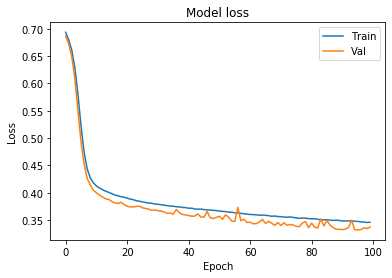

In [187]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

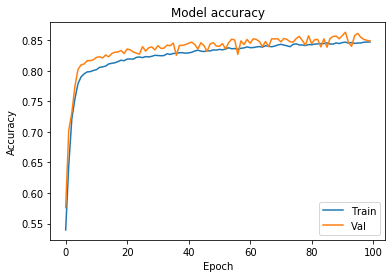

In [188]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Since the improvements in our model to the training set looks somewhat underfitting with improvements to the validation set, 
it doesn’t seem like underfitting is a huge problem in our model.the reasons is other than dropout or other regularization techniques).
The key technique to avoiding underfitting is using a model with plenty of layers and parameters, and picking an appropriate architecture.

**Bibliography:**
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, 2nd Edition, 2019
Aurélien Géron
O'Reilly
